In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
df=df.set_index(['Month'])
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


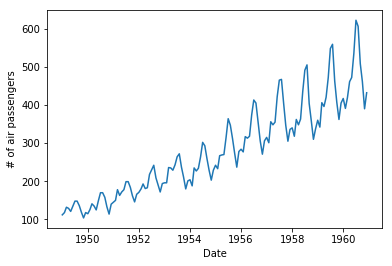

In [7]:
plt.xlabel('Date')
plt.ylabel('# of air passengers')
plt.plot(df)

In [8]:
def plot_graph(df):
    rolmean=df.rolling(window=12).mean()
    rolstd=df.rolling(window=12).std()
    
    orig=plt.plot(df,label='Original')
    mean=plt.plot(rolmean,label='Rolling mean')
    std=plt.plot(rolstd,label='Rolling std')
    plt.legend(loc='best')
    plt.show()

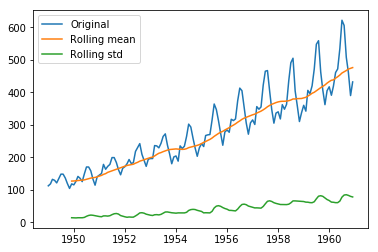

In [9]:
plot_graph(df)

In [10]:
air_passenger_data_log_scaled=np.log(df)
ma=air_passenger_data_log_scaled.rolling(window=3).mean()
air_passenger_data_log_scaled_minusma=air_passenger_data_log_scaled-ma

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
air_passenger_data_log_scaled_minusma.dropna(inplace=True)
train,test=train_test_split(air_passenger_data_log_scaled_minusma,test_size=0.10,shuffle=False)
model_arima=ARIMA(train,order=(1,2,1))

model_arima_fit=model_arima.fit()


C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [16]:
test.head()

,#Passengers
Month,
1959-10-01,-0.148750
1959-11-01,-0.121084
1959-12-01,0.035772
1960-01-01,0.056880
1960-02-01,-0.033186


In [17]:
predictions=model_arima_fit.predict(start='1959-10-01',end='1960-12-01')
predictions

1959-10-01   -0.126722
1959-11-01   -0.128677
1959-12-01   -0.130441
1960-01-01   -0.132198
1960-02-01   -0.133956
1960-03-01   -0.135713
1960-04-01   -0.137470
1960-05-01   -0.139227
1960-06-01   -0.140985
1960-07-01   -0.142742
1960-08-01   -0.144499
1960-09-01   -0.146256
1960-10-01   -0.148014
1960-11-01   -0.149771
1960-12-01   -0.151528
Freq: MS, Name: predicted_mean, dtype: float64

In [18]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)
print('Test MSE %.3f' % error)

Test MSE 0.025


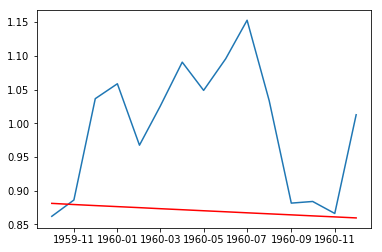

In [20]:
predict=np.exp(predictions)
test_set=np.exp(test)
plt.plot(test_set)
plt.plot(predict,color='red')

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
model_arima=ARIMA(train,order=(15,2,2))

model_arima_fit=model_arima.fit()


C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nafissaad\AppD

In [31]:
predictions=model_arima_fit.predict(start='1959-10-01',end='1960-12-01')
predictions

1959-10-01   -0.154938
1959-11-01   -0.130542
1959-12-01    0.017544
1960-01-01    0.081367
1960-02-01   -0.000583
1960-03-01    0.082968
1960-04-01    0.048286
1960-05-01    0.037330
1960-06-01    0.111789
1960-07-01    0.125816
1960-08-01    0.060968
1960-09-01   -0.103067
1960-10-01   -0.145254
1960-11-01   -0.123282
1960-12-01    0.024078
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)
print('Test MSE %.5f' % error)

Test MSE 0.00068


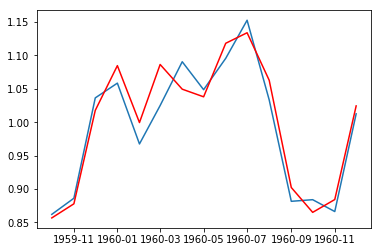

In [33]:
predict=np.exp(predictions)
test_set=np.exp(test)
plt.plot(test_set)
plt.plot(predict,color='red')

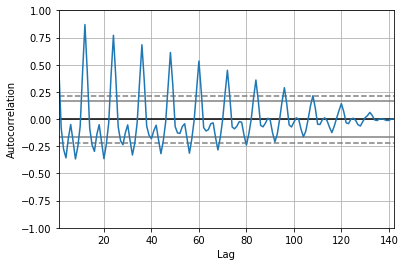

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(air_passenger_data_log_scaled_minusma)

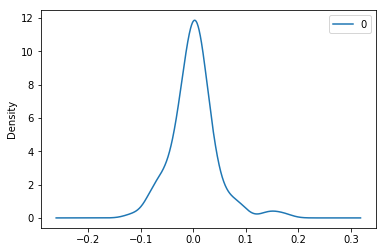

In [37]:
from pandas import DataFrame
residual=DataFrame(model_arima_fit.resid)
residual.plot(kind='kde')